# Part 1 - Matplotlib for Data Visualization


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
## Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [24]:
##Loading the data.
##Google data
Google_df=pd.read_csv('/content/drive/MyDrive/Assignment/Data_x2_Final/google.txt', sep='\t', header=None, names=["Modified_Julian_Date", "Stock_Value"])
Google_df.head(5)

,Modified_Julian_Date,Stock_Value
0,55463,527.21
1,55462,513.48
2,55461,516.00
3,55460,513.46
4,55459,508.28


In [25]:
##Yahoo data
Yahoo_df = pd.read_csv('/content/drive/MyDrive/Assignment/Data_x2_Final/yahoo.txt', sep='\t')
Yahoo_df.head(5)

,Modified Julian Date,Stock Value
0,55463,14.40
1,55462,14.17
2,55461,14.04
3,55460,14.18
4,55459,13.86


In [26]:
##New York
NY_df = pd.read_csv('/content/drive/MyDrive/Assignment/Data_x2_Final/ny.txt', sep='\t')
NY_df.head(5) 


,Modified Julian Date,Max Temperature
0,48988,52
1,49019,38
2,49047,31
3,49078,66
4,49108,75


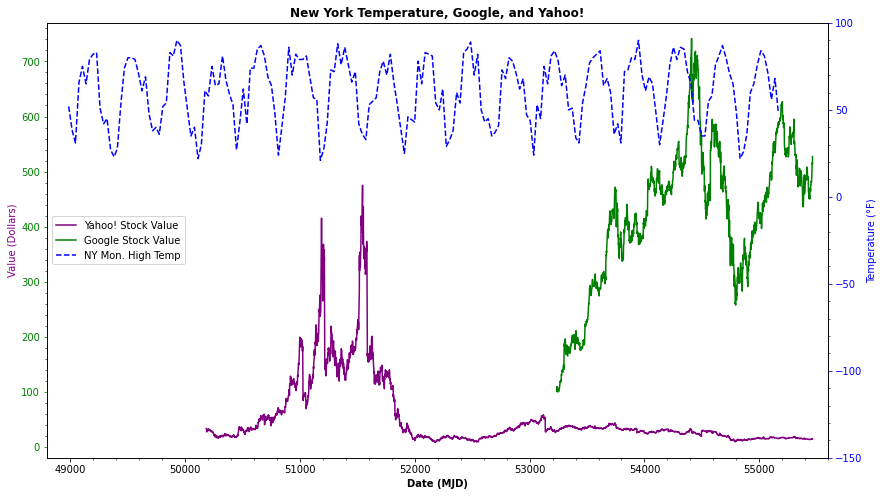

In [27]:
### defining data for plots ###
X1 = Google_df['Modified_Julian_Date']
X2 = Yahoo_df['Modified Julian Date']
X3 = NY_df['Modified Julian Date']
y1 = Google_df['Stock_Value']
y2 = Yahoo_df['Stock Value']
y3 = NY_df['Max Temperature']

### Set Figure: Plot figure ###
fig = plt.figure(figsize=(14, 8))


### Set Axes###
ax1 = fig.subplots()

ax1.xaxis.set_major_locator(MultipleLocator(1000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

### Populate Axes - Plots 1,2 ###
plot_2 = ax1.plot(X1,y1,color='green', label='Google Stock Value')
plot_1 = ax1.plot(X2,y2,color='purple', label='Yahoo! Stock Value')

### Creating second y-axis ###
ax2 = ax1.twinx() 

### Populate Axes - Plot 3 ###
plot_3 = ax2.plot(X3,y3,color='blue', linestyle='--', label='NY Mon. High Temp')

### Set Artists ###
ax2.set_ylabel('Temperature (°F)', color = 'blue') 
ax2.axis([48800,55600,-150,100])

ax2.yaxis.set_major_locator(MultipleLocator(50))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.axis([48800,55600,-20,770])
ax1.set_xlabel("Date (MJD)", color='Black',fontweight="bold")
ax1.set_ylabel("Value (Dollars)", color = 'purple')
ax1.tick_params(axis='x', colors='black')    #setting up X-axis tick color to red
ax1.tick_params(axis='y', colors='green')

ax2.tick_params(axis='y', colors='blue')

lns = plot_1 + plot_2 + plot_3
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc='center left')

ax1.set_title("New York Temperature, Google, and Yahoo!", fontweight="bold")
plt.show()

#Part 2 - Train a Kanye West, Pikachu, and Cat image classifier


>>I downloaded 900 samples of each class using bing image downloader, my training set contains 700 samples of each class, validation sample contains 150 samples of each class and test sample contains 150 images, 50 from each sample .
>>For downloading images of kanye I used terms like kanye, kanye west, kanye images, kanye pictures etc, for pikachu i used pikachu, pichu, raichu, pikachu pokemon etc., for cats I took images from kaggle dataset. Saved different class samples in different folders and test set had mixed samples.
>>I used the code of transfer learning from alex's notebook(reference) and changed the code for multiclass classification by changing the output for dense layer to 3 from 1 and the activation function to softmax from sigmoid. Also the labels were changed to one hot encoded using to_categorical function.



In [28]:
#Importing dependencies
import tensorflow.keras as keras
print(keras.__version__) # tested for 2.4.0

from __future__ import absolute_import, division, print_function # make it compatible w Python 2
import os
import h5py # to handle weights
import os, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from IPython.display import Image, display

2.8.0


In [29]:
print('Number of cat training images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/train/cats'))[2]))
print('Number of kanye training images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/train/kanye'))[2]))
print('Number of pikachu training images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/train/pikachu'))[2]))
print('Number of cat validation images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/Validation/cats'))[2]))
print('Number of kanye validation images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/Validation/kanye'))[2]))
print('Number of pikachu validation images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/Validation/pikachu'))[2]))
print('Number of uncategorized test images:', len(next(os.walk('/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/test/mixed'))[2]))

# There should be 700 train cat, kanye and pikachu images each, 
# 150 validation cats, kanye and pikachu images each and 150 uncategorized.

Number of cat training images: 700
Number of kanye training images: 700
Number of pikachu training images: 700
Number of cat validation images: 150
Number of kanye validation images: 150
Number of pikachu validation images: 150
Number of uncategorized test images: 150


In [30]:
# Define variables
TRAIN_DIR = '/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/train/'
VAL_DIR = '/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/Validation/'
TEST_DIR = '/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/test/' #mixed 

img_width, img_height = 150, 150

n_train_samples = 2100
n_validation_samples = 450
n_epoch = 50
n_test_samples = 150

In [31]:
# Function for saving bottleneck features

#  Run model once to record the bottleneck features using image data generators:

def save_bottleneck_features():

    from tensorflow.keras import applications
    model = applications.vgg16.VGG16(include_top=False, weights='imagenet', \
                                     input_tensor=None, input_shape=(img_width, img_height,3), classes = 3)
    print(model.summary())
    
    print('TensorFlow VGG16 model architecture loaded')
    # include_top = False, because we drop last layer, then we also only need to
    # download weight file that is small
    # input_shape with channels last for tensorflow
    
    # Our original images consist in RGB coefficients in the 0-255 interval, 
    # but such values would be too high for our models to process (given typical learning rate), 
    # so we target values between 0 and 1 instead by scaling with a 1/255. factor.
    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR,n_samples,name_str):
        '''This is a generator that will read pictures found in
        subfolers of 'data/*', and indefinitely generate
        batches of rescaled images used to predict
        the bottleneck features of the images once
        using model.predict_generator(**args**)'''

        print('Generate '+name_str+' image features')

        generator = datagen.flow_from_directory(
            DIR,
            target_size=(img_width, img_height),
            batch_size=1,
            class_mode=None, # this means our generator will only yield batches of data, no labels
            shuffle=False) # our data will be in order, so all first 700 images will be cats, then 700 kanye, then 700 pikachu
        
        
        features = model.predict_generator(generator, n_samples,verbose=True)
        # the predict_generator method returns the output of a model, given
        # a generator that yields batches of numpy data
        
        np.save('features_'+name_str+'.npy', features) # save bottleneck features to file
    
    generate_features(TEST_DIR, n_test_samples, 'test')
    generate_features(TRAIN_DIR, n_train_samples, 'train')
    generate_features(VAL_DIR, n_validation_samples, 'validation')
    
    print('\nDone! Bottleneck features have been saved')


save_bottleneck_features()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


150/150 [==============================] - 2s 12ms/step
Generate train image features
Found 2100 images belonging to 3 classes.
2100/2100 [==============================] - 37s 18ms/step
Generate validation image features
Found 450 images belonging to 3 classes.
450/450 [==============================] - 8s 17ms/step

Done! Bottleneck features have been saved


In [32]:
# Extra
# Obtain class labels and multiclass classification for validation data
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(VAL_DIR,target_size=(img_width, img_height),
                                        batch_size=32,class_mode=None,shuffle=False)

val_labels = val_gen.classes

print('\nClassifications:\n',val_gen.class_indices)
print('\nClass labels:\n',val_labels)

Found 450 images belonging to 3 classes.

Classifications:
 {'cats': 0, 'kanye': 1, 'pikachu': 2}

Class labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [33]:
# Load in bottleneck features
# Run the code below to train your CNN with the training data

def train_model():
    train_data = np.load('features_train.npy')
    print(train_data.shape)
    # the features were saved in order, so recreating the labels is easy
    train_labels = to_categorical(np.array([0] * (n_train_samples // 3) + [1] * (n_train_samples // 3) + [2] * (n_train_samples // 3)))
    #print(train_labels.shape)

    validation_data = np.load('features_validation.npy')
    print(validation_data.shape)
    # same as val_labels above
    validation_labels = to_categorical(np.array([0] * (n_validation_samples // 3) + [1] * (n_validation_samples // 3) + [2] * (n_validation_samples // 3)))

    # Add top layers trained ontop of extracted VGG features
    # Small fully connected model trained on top of the stored features
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    print(model.summary())

    '''
    #We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. 
    #To go with it we will also use the binary_crossentropy loss to train our model.
    '''
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    MODEL_WEIGHTS_FILE = 'vgg16-best-weights.h5'
    #lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)
    callbacks = [ModelCheckpoint(MODEL_WEIGHTS_FILE, monitor='val_accuracy', verbose=1, save_best_only=True)]
    
    history = model.fit(train_data, train_labels, verbose=1,epochs=50, batch_size=32,validation_data=(validation_data, validation_labels), callbacks=callbacks)

    # Save weights to disk

    # Save model architecture to disk
    model_json = model.to_json()
    with open("mod_appendix.json", "w") as json_file: # save model
        json_file.write(model_json)
    
    # Save model weights
    model.save_weights("catvsdogs_VGG16_pretrained_tf_top.h5") # save weights
    print("Saved model to disk")
    print('Done!')
    
    return(history)
    
history = train_model()

(2100, 4, 4, 512)
(450, 4, 4, 512)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,098,179
Trainable params: 2,098,179
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
59/66 [=========================>....] - ETA: 0s - loss: 0.4634 - accuracy: 0.8422
Epoch 1: val_accuracy improved from -inf t

In [ ]:
history.model.load_weights('vgg16-best-weights.h5')

In [ ]:
model = history.model

In [34]:
model.summary() # only the last layer hsa 2Mn weights.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,098,179
Trainable params: 2,098,179
Non-trainable params: 0
_________________________________________________________________


In [55]:
validation_data = np.load('features_validation.npy')

val_pred_class = model.predict(validation_data,verbose=0) # predict image classes 
#val_pred_prob = model.predict_proba(validation_data,verbose=0) # predict image probabilities

labels = to_categorical(val_labels)

print('\nVal loss & val_acc')
#print(validation_data,labels)
print(model.evaluate(validation_data,labels,verbose=0))
# First number is validation loss, loss of the objective function
# Second number validation accuracy


Val loss & val_acc
[0.08361935615539551, 0.9800000190734863]


In [36]:
print('Model accuracy on validation set:', np.round(model.evaluate(validation_data,labels,verbose=0)[1]*100),'%')



Model accuracy on validation set: 98.0 %


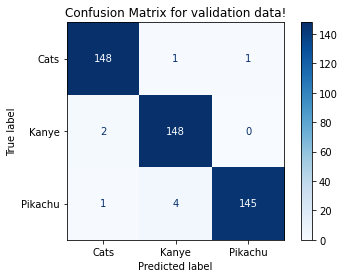

In [72]:
##Confusion matrix for validation set
class_pred = val_pred_class
y_pred = [np.argmax(i) for i in class_pred]
y_true = val_labels
#print(y_pred, y_true)
class_labels = ["Cats", "Kanye", "Pikachu"]


cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for validation data!")
plt.show()


In [56]:
##Prediction and calculating accuracy for test data
test_data = np.load('features_test.npy')

test_pred_class = model.predict(test_data,verbose=0) # predict image classes 
test_pred = np.array([np.argmax(i) for i in test_pred_class])
#print(test_pred)
#val_pred_prob = model.predict_proba(validation_data,verbose=0) # predict image probabilities

test_labels = np.array([2] * 50 + [0] * 50 + [1] * 50)
#print(test_labels)

labels = to_categorical(test_labels)
#print(test_data,labels)

print('\nTest loss & test_acc')
print(model.evaluate(test_data,labels,verbose=0))
# First number is test loss, loss of the objective function
# Second number test accuracy


Test loss & test_acc
[0.10551008582115173, 0.95333331823349]


In [57]:
print('Model accuracy on test set:', np.round(model.evaluate(test_data,labels,verbose=0)[1]*100),'%')

Model accuracy on test set: 95.0 %


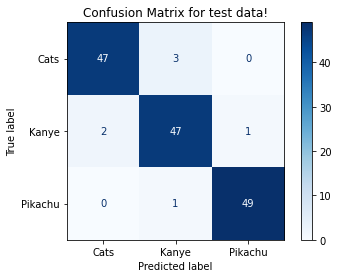

In [71]:
##Confusion matrix for test set
y_pred = test_pred
y_true = test_labels
#print(y_pred, y_true)
class_labels = ["Cats", "Kanye", "Pikachu"]


cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for test data!")
plt.show()

In [59]:
from PIL import Image

test_data = np.load('features_test.npy')

test_images =  [TEST_DIR+'mixed/'+img for img in sorted(os.listdir(TEST_DIR+'mixed/'))]

def read_image(file_path):
    # For image visualization
    im = np.array(Image.open(file_path))
    return im

def plot_pic(img):
    pic = read_image(img)    
    plt.figure(figsize=(5,5))
    plt.imshow(pic)
    plt.show()



I think this is a PIKACHU with 73.83479% probability


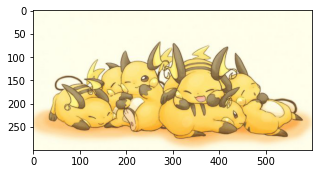



I think this is a PIKACHU with 99.9579% probability


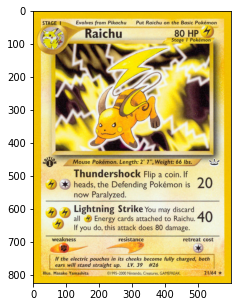



I think this is a PIKACHU with 99.99268% probability


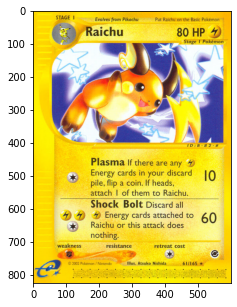



I think this is a PIKACHU with 99.73603% probability


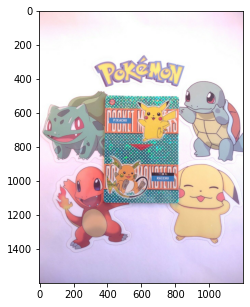



I think this is a PIKACHU with 99.60989% probability


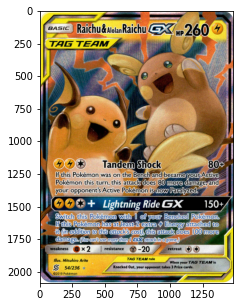



I think this is a PIKACHU with 99.43915% probability


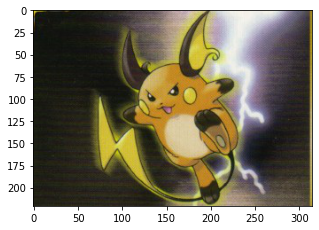



I think this is a PIKACHU with 99.99996% probability


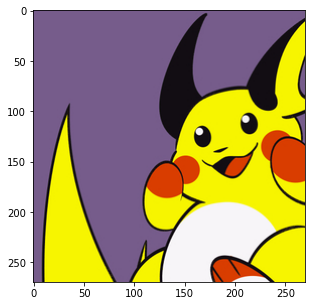



I think this is a PIKACHU with 99.85562% probability


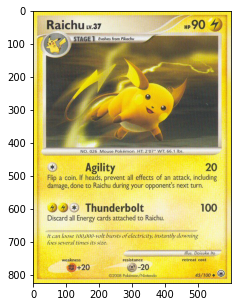



I think this is a PIKACHU with 73.73443% probability


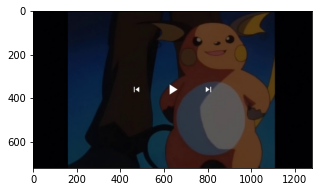



I think this is a CAT with 97.91684% probability


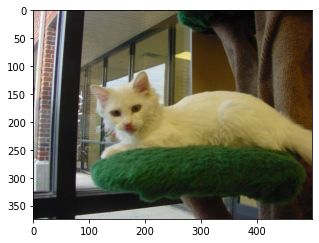



I think this is a CAT with 99.93924% probability


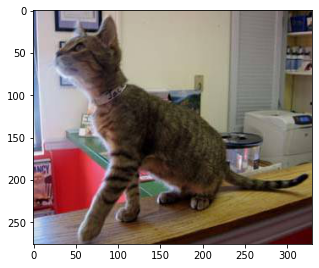



I think this is a CAT with 99.97455% probability


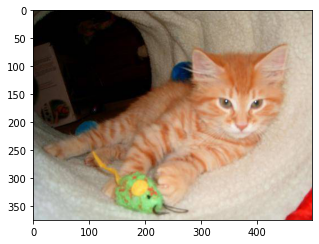



I think this is a CAT with 99.98741% probability


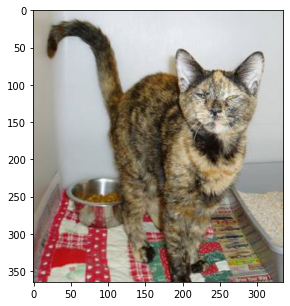



I think this is a CAT with 99.99996% probability


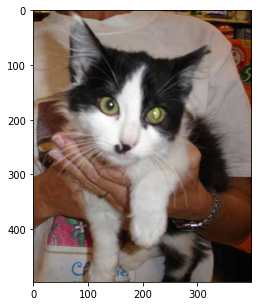



I think this is a CAT with 99.94875% probability


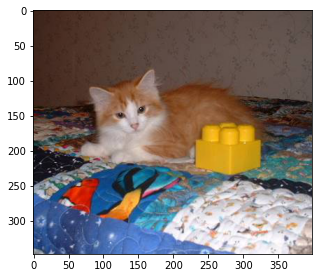



I think this is a CAT with 99.81551% probability


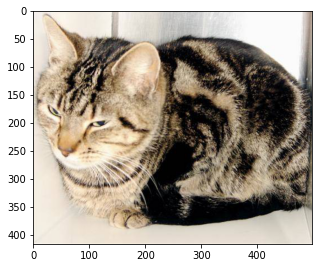



I think this is a CAT with 99.99998% probability


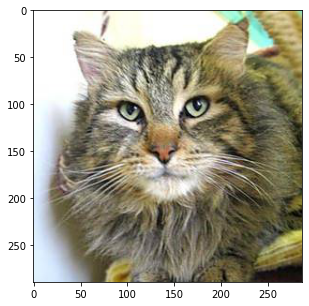



I think this is a CAT with 99.99911% probability


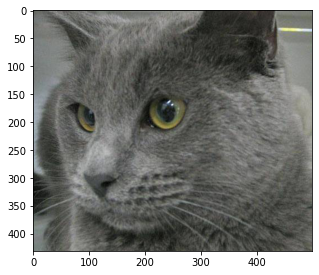



I think this is a KANYE with 99.99839% probability


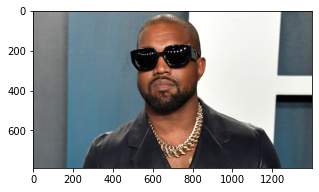



I think this is a KANYE with 99.99778% probability


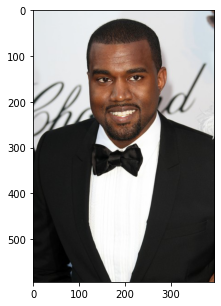



I think this is a KANYE with 99.99686% probability


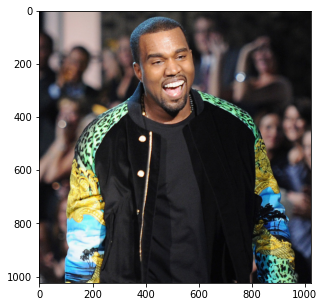



I think this is a KANYE with 99.96461% probability


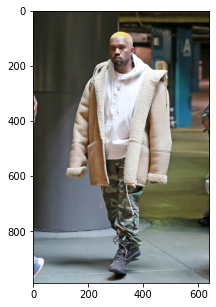



I think this is a KANYE with 99.99994% probability


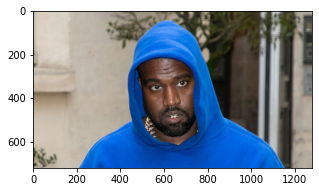



I think this is a KANYE with 99.95388% probability


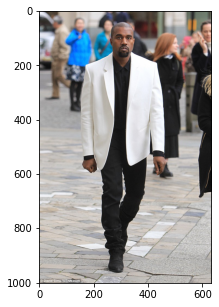



I think this is a KANYE with 99.75982% probability


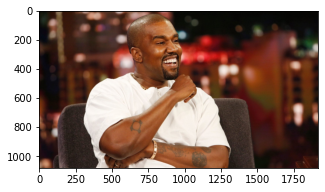



I think this is a KANYE with 99.98271% probability


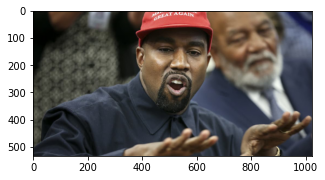



I think this is a KANYE with 99.41468% probability


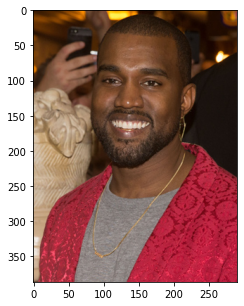



I think this is a KANYE with 99.98755% probability


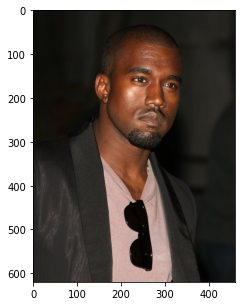

In [70]:
def predict(mod,i=0,r=None):
    if r==None:
        r=[i]
        
    for idx in r:
        if test_images[idx]=='/content/drive/MyDrive/Assignment/Data_x2_Final/dataset/test/mixed/.DS_Store' or '.ipynb_checkpoints' in test_images[idx]:
            continue
        #print(test_images[idx])
        class_pred = mod.predict(test_data,verbose=0)[idx]
        #prob_pred = mod.predict_proba(test_data,verbose=0)[idx]
        #print(class_pred)

        max_index = np.argmax(class_pred)
        
        if max_index ==0:
            class_guess='CAT'
            prob = class_pred[0]
        elif max_index == 1:
            class_guess = 'KANYE'
            prob = class_pred[1]
        else:
            class_guess='PIKACHU'
            prob = class_pred[2]
        
        print('\n\nI think this is a ' + class_guess + ' with ' + str(round(float(prob)*100,5)) + '% probability')
        plot_pic(test_images[idx])

predict(model,r=range(41,50))       
predict(model,r=range(91,110)) # seems to be doing really well